<a href="https://colab.research.google.com/github/AAKANKSHA123-123/MTECH-PROJECT/blob/main/samples_new_code_visual_import.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ipynb

In [2]:
%cd /content/drive/MyDrive/Colab Notebooks

[Errno 2] No such file or directory: '/content/drive/MyDrive/Colab Notebooks'
/content


In [3]:
!pip install import-ipynb
import import_ipynb

  Created wheel for import-ipynb: filename=import_ipynb-0.1.3-py3-none-any.whl size=2975 sha256=edac21a1556e1e56bbcbb9577fe6680307567224b7f52831e807cf97d6b40580
  Stored in directory: /root/.cache/pip/wheels/b1/5e/dc/79780689896a056199b0b9f24471e3ee184fbd816df355d5f0
Successfully built import-ipynb


In [4]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [5]:
%cp /content/drive/MyDrive/newresultsdata.csv
%cp /content/drive/MyDrive/Colab \ Notebooks/Newcodevisualvgg16.ipynb

cp: missing destination file operand after '/content/drive/MyDrive/newresultsdata.csv'
Try 'cp --help' for more information.
cp: cannot stat '/content/drive/MyDrive/Colab': No such file or directory


In [6]:
!python /content/drive/MyDrive/Newcodevisualvgg16.ipynb

python3: can't open file '/content/drive/MyDrive/Newcodevisualvgg16.ipynb': [Errno 2] No such file or directory


In [7]:
import numpy as np
import tensorflow as tf
import random as rn



In [8]:
##fixing numpy RS
np.random.seed(42)

##fixing tensorflow RS
tf.random.set_seed(32)

##python RS
rn.seed(12)

In [9]:
'''import h5py
filename = "/content/drive/MyDrive/newresults/dataset_train.hdf5"

with h5py.File(filename, "r") as f:
    # List all groups
    print("Keys: %s" % f.keys())
    a_group_key = list(f.keys())[0]

    # Get the data
    data = list(f[a_group_key])'''

'import h5py\nfilename = "/content/drive/MyDrive/newresults/dataset_train.hdf5"\n\nwith h5py.File(filename, "r") as f:\n    # List all groups\n    print("Keys: %s" % f.keys())\n    a_group_key = list(f.keys())[0]\n\n    # Get the data\n    data = list(f[a_group_key])'

In [10]:
!pip install tensorflow-io

     |████████████████████████████████| 22.7 MB 1.5 MB/s 
     |████████████████████████████████| 2.1 MB 37.8 MB/s 


In [11]:
import tensorflow_io as tfio

In [12]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [13]:
import h5py


In [14]:
with h5py.File('/content/drive/MyDrive/newresults/training.hdf5', 'r') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    img_data_tr = hf.get('imgg_train')
    img_data1_tr = np.array(img_data_tr)
    print(img_data1_tr.shape)
    ques_data_tr = hf.get('quess_train')
    ques_data1_tr = np.array(ques_data_tr)
    print(ques_data1_tr.shape)
    anss_data_tr = hf.get('anss_train')
    anss_data1_tr = np.array(anss_data_tr)
    print(anss_data1_tr.shape)

list of dataset in this file: 
 ['anss_train', 'imgg_train', 'quess_train']
(172,)
(172, 18)
(172, 85)


In [15]:
with h5py.File('/content/drive/MyDrive/newresults/validation.hdf5', 'r') as hf:
    ls = list(hf.keys())
    print('list of dataset in this file: \n',ls)
    img_data_val = hf.get('imgg_val')
    img_data1_val = np.array(img_data_val)
    print(img_data1_val.shape)
    ques_data_val = hf.get('quess_val')
    ques_data1_val = np.array(ques_data_val)
    print(ques_data1_val.shape)
    anss_data_val = hf.get('anss_val')
    anss_data1_val = np.array(anss_data_val)
    print(anss_data1_val.shape)

list of dataset in this file: 
 ['anss_val', 'imgg_val', 'quess_val']
(44,)
(44, 18)
(44, 85)


In [16]:
datrain_tens = tf.data.Dataset.from_tensor_slices((img_data1_tr,ques_data1_tr,anss_data1_tr))
daval_tens = tf.data.Dataset.from_tensor_slices((img_data1_val,ques_data1_val,anss_data1_val))
#print(type(datrain_img))


In [17]:
def createDataset2(image_paths,question_vector,answer_vector):
    dataset_input = tf.data.Dataset.from_tensor_slices((image_paths, question_vector.astype(np.float32)))
    dataset_output = tf.data.Dataset.from_tensor_slices((answer_vector.astype(np.float32)))
    # using map to load the numpy files in parallel
    dataset_input = dataset_input.map(lambda img, ques : tf.numpy_function(get_imageTensor, [img, ques], [tf.float32, tf.float32]),
                                      num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # shuffling and batching
    #dataset_input = dataset_input.shuffle(BUFFER_SIZE).batch(BATCH_SIZE)
    dataset_input = dataset_input.batch(BATCH_SIZE)
    dataset_output = dataset_output.batch(BATCH_SIZE)#.repeat()
    
    dataset = tf.data.Dataset.zip((dataset_input, dataset_output))
    dataset = dataset.prefetch(buffer_size = tf.data.experimental.AUTOTUNE)

    return dataset

In [18]:
def get_imageTensor(img, ques):
    path = img.decode('utf-8').replace(imageDirectory,'/content/drive/MyDrive/newresults/data'+'/'+'train2014_Numpy').replace('.jpg',"") +'.npy'
    
    img_tensor = np.load(path)
    #img_tensor = all_image_dict[img.decode('utf-8')]
    
    return img_tensor, ques

In [19]:
BATCH_SIZE = 2

In [20]:
data_set_train = createDataset2(img_data1_tr,ques_data1_tr,anss_data1_tr)
data_set_val = createDataset2(img_data1_val,ques_data1_val,anss_data1_val)

#print(datrain)

In [21]:
import os
currentDirectory = "/content/drive/MyDrive/newresults/"
os.chdir(currentDirectory)
currentDirectory = ""
dataDirectory = currentDirectory + "data/"
#imageDirectory = dataDirectory + "train2014/"
imageDirectory = '/content/train2014/'
imageNumpyDirectory = dataDirectory + "train2014_Numpy" + ''

modelsDirectory = currentDirectory + "Models/"


img_width = 224
img_height = 224

#BATCH_SIZE = 64
#BATCH_SIZE = 10
BUFFER_SIZE = 300

In [22]:
def callBacksList():
    """
    returns list of callback's
    """
    filepath = modelsDirectory + ModelName + "/best.hdf5"
    checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath = filepath, monitor = 'val_accuracy', verbose = 1, save_best_only = True, mode = 'auto')
    reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = 'val_accuracy', patience = 3)
    early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_accuracy', patience = 4, verbose = 1)

    #directory for tensorboard to save evnts
    log_dir= modelsDirectory + "logs/fit/" + ModelName + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    os.makedirs(log_dir)

    print("TensorBoard Folder for this Execution",log_dir)#creating TensorBoard call back,this will write all events to given folder
    tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir = log_dir, histogram_freq = 1)

    history = tf.keras.callbacks.History()
    callbacks_list = [reduce_lr, early_stop, history, tensorboard_callback, checkpoint]
    return callbacks_list

def Build_BaseModel():
    image_input = tf.keras.layers.Input(shape=(7,7,512))
    question_input = tf.keras.layers.Input(shape=(opques.shape[1],))

    image_conv_layer1 = tf.keras.layers.Conv2D(filters = 4096, kernel_size = 7 , strides = 1, padding = "valid", activation = 'relu',
                                               kernel_initializer = tf.keras.initializers.he_normal(seed=45))(image_input)

    image_flatten = tf.keras.layers.Flatten()(image_conv_layer1)

    image_dense_1 = tf.keras.layers.Dense(4096, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=54))(image_flatten)
    
    image_dense_2 = tf.keras.layers.Dense(1024, activation = tf.nn.relu, 
                                          kernel_initializer = tf.keras.initializers.he_uniform(seed=32))(image_dense_1)


    # Input 2 Pathway
    question_emb = tf.keras.layers.Embedding(input_dim = len(tokenizer.word_index) + 1, output_dim = 300 ,name = "Embedding_Layer",
                                             embeddings_initializer = tf.keras.initializers.RandomNormal(mean=0, stddev=1, seed=23))(question_input)

    question_lstm = tf.keras.layers.LSTM(1024, 
                                         kernel_initializer = tf.keras.initializers.glorot_uniform(seed=26),
                                         recurrent_initializer = tf.keras.initializers.orthogonal(seed=54),
                                         bias_initializer=tf.keras.initializers.zeros())(question_emb)

    question_flatten = tf.keras.layers.Flatten(name="Flatten_lstm")(question_lstm)

    
    image_question = tf.keras.layers.Multiply()([image_dense_2, question_flatten])


    image_question_dense_1 = tf.keras.layers.Dense(1000, activation = tf.nn.relu,
                                                    kernel_initializer = tf.keras.initializers.he_uniform(seed=19))(image_question)
    
    image_question_dense_2 = tf.keras.layers.Dense(1000, activation = tf.nn.relu, 
                                                   kernel_initializer = tf.keras.initializers.he_uniform(seed=28))(image_question_dense_1)

    output = tf.keras.layers.Dense(len(ans_vocab), activation=tf.nn.softmax, 
                                   kernel_initializer = tf.keras.initializers.glorot_normal(seed=15))(image_question_dense_2)

    # Create Model
    model = tf.keras.models.Model(inputs = [image_input, question_input], outputs = output)
    # Compile
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

In [23]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/newresults/my_vqas_model')

# Check its architecture
new_model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 7, 7, 512)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 1, 1, 4096)   102764544   input_2[0][0]                    
__________________________________________________________________________________________________
input_3 (InputLayer)            [(None, 18)]         0                                            
__________________________________________________________________________________________________
flatten (Flatten)               (None, 4096)         0           conv2d[0][0]                     
____________________________________________________________________________________________

In [24]:
!ls /content/drive/MyDrive/newresults/my_vqa_model

assets	keras_metadata.pb  saved_model.pb  variables


In [25]:
import glob

In [28]:
import datetime
fit_mode = new_model.fit(data_set_train, epochs = 20, validation_data = data_set_val)
#fit_model.save('/content/drive/MyDrive/newresults/fitmodel')
#new_model.fit(datrain, epochs = 20)

Epoch 1/20
86/86 [==============================] - 23s 264ms/step - loss: 3.4468 - accuracy: 0.2500 - val_loss: 1.8357 - val_accuracy: 0.2273
Epoch 2/20
86/86 [==============================] - 23s 263ms/step - loss: 3.3526 - accuracy: 0.2674 - val_loss: 1.7795 - val_accuracy: 0.2273
Epoch 3/20
86/86 [==============================] - 23s 265ms/step - loss: 3.3304 - accuracy: 0.2791 - val_loss: 1.7564 - val_accuracy: 0.2273
Epoch 4/20
86/86 [==============================] - 23s 264ms/step - loss: 3.3039 - accuracy: 0.2674 - val_loss: 1.6984 - val_accuracy: 0.2273
Epoch 5/20
86/86 [==============================] - 23s 265ms/step - loss: 3.2915 - accuracy: 0.2849 - val_loss: 1.6862 - val_accuracy: 0.1591
Epoch 6/20
86/86 [==============================] - 23s 264ms/step - loss: 3.2551 - accuracy: 0.2907 - val_loss: 1.6763 - val_accuracy: 0.1591
Epoch 7/20
86/86 [==============================] - 23s 264ms/step - loss: 3.2362 - accuracy: 0.2907 - val_loss: 1.6136 - val_accuracy: 0.1591

In [29]:
new_model.save('/content/drive/MyDrive/newresults/Models')

INFO:tensorflow:Assets written to: /content/drive/MyDrive/newresults/Models/assets


INFO:tensorflow:Assets written to: /content/drive/MyDrive/newresults/Models/assets
/usr/local/lib/python3.7/dist-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


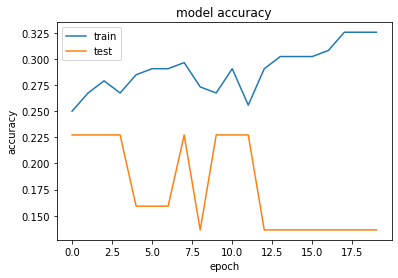

In [35]:
print(fit_mode.history.keys())
import matplotlib.pyplot as plt
# summarize history for accuracy
plt.plot(fit_mode.history['accuracy'])
plt.plot(fit_mode.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

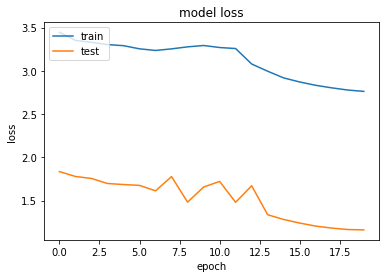

In [36]:
plt.plot(fit_mode.history['loss'])
plt.plot(fit_mode.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [30]:
#model.load_weights(modelsDirectory + ModelName + "/best.hdf5")
test_idx = np.random.randint(len(X_val), size = 3)
model_vgg = VGG19_Top()
k = 5

for idx in test_idx:
    test_image_id = X_val['image_id'].values[idx]
    test_question = X_val['question'].values[idx]
    actual_answer = X_val['multiple_choice_answer'].values[idx]
    test_image_path = imageDirectory + 'COCO_train2014_' + '%012d.jpg' % (test_image_id)

    test_image_features = model_vgg(tf.expand_dims(load_image(test_image_path)[0], 0))
    test_question_features = tf.keras.preprocessing.sequence.pad_sequences(tokenizer.texts_to_sequences([test_question]),padding='post',
                                                                           maxlen=question_vector_train.shape[1])
    y_pred = model.predict([test_image_features,test_question_features])

    class_indices = tf.math.top_k(y_pred,k=k).indices.numpy()
    percentages = tf.math.top_k(y_pred,k=k).values.numpy()[0] * 100
    predictions = []
    for idx,i in enumerate(class_indices[0]):
        classes = np.zeros((1,1000))
        classes[0][i] = 1
        predictions.append((label_encoder.inverse_transform(classes)[0],percentages[idx]))

    img=mpimg.imread(test_image_path)
    imgplot = plt.imshow(img)
    plt.axis('off')
    plt.show()

    print("Question :", test_question.replace("<start> ","").replace(" <end>",""))
    print("Actual Answer: ", actual_answer)
    print("Top Predicted answers: ",predictions)
    print("*"*150)

NameError: ignored